<a href="https://colab.research.google.com/github/ahmed123234/zoomcamp-ML/blob/main/RF_DT_homework_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the car fuel efficiency dataset to predict fuel efficiency using regression models. The analysis should include data preparation, training and evaluating a decision tree regressor, training and evaluating a random forest regressor, experimenting with the `n_estimators` parameter for the random forest, and experimenting with the `max_depth` and `n_estimators` parameters for the random forest to find the best `max_depth`. The dataset is located at "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv".

## Download the dataset

### Subtask:
Download the fuel efficiency dataset using `wget`.


**Reasoning**:
Use the `wget` command to download the dataset from the provided URL.



In [1]:
!wget "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"

--2025-11-03 17:40:11--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.05s   

2025-11-03 17:40:11 (15.2 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



## Load and prepare the data

### Subtask:
Load the data into a pandas DataFrame, fill missing values, perform the train/validation/test split, and use `DictVectorizer` to transform the data.


**Reasoning**:
Load the data into a pandas DataFrame, fill missing values, perform the train/validation/test split, and use `DictVectorizer` to transform the data as per the instructions.



In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

# Load the dataset
df = pd.read_csv('car_fuel_efficiency.csv')
target = 'fuel_efficiency_mpg'

# Fill missing values with 0
df = df.fillna(0)

# Split the data into training, validation, and testing sets
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1) # 0.25 of 0.8 is 0.2

# Separate the target variable from the features
y_train = df_train[target]
y_val = df_val[target]
y_test = df_test[target]

del df_train[target]
del df_val[target]
del df_test[target]

# Identify categorical and numerical features
# categorical_features = ['origin']
# numerical_features = ['cylinders', 'displacement', 'horsepower', 'vehicle_weight', 'acceleration', 'model_year']

# Convert DataFrames to dictionaries
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')
test_dicts = df_test.to_dict(orient='records')

# Use DictVectorizer to transform the data
dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

display(X_train.shape)
display(X_val.shape)
display(X_test.shape)

(5822, 14)

(1941, 14)

(1941, 14)

In [3]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,0.0,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,0.0,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


## Train and evaluate Decision Tree Regressor

### Subtask:
Train a Decision Tree Regressor with `max_depth=1` and identify the feature used for splitting.

In [4]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Train a Decision Tree Regressor with max_depth=1
dt = DecisionTreeRegressor(max_depth=1, random_state=1)
dt.fit(X_train, y_train)

# Identify the feature used for splitting
feature_name = dv.get_feature_names_out()[dt.tree_.feature[0]]
print(f"The feature used for splitting with max_depth=1 is: {feature_name}")

The feature used for splitting with max_depth=1 is: vehicle_weight


### Subtask:
Visualize the trained Decision Tree Regressor.

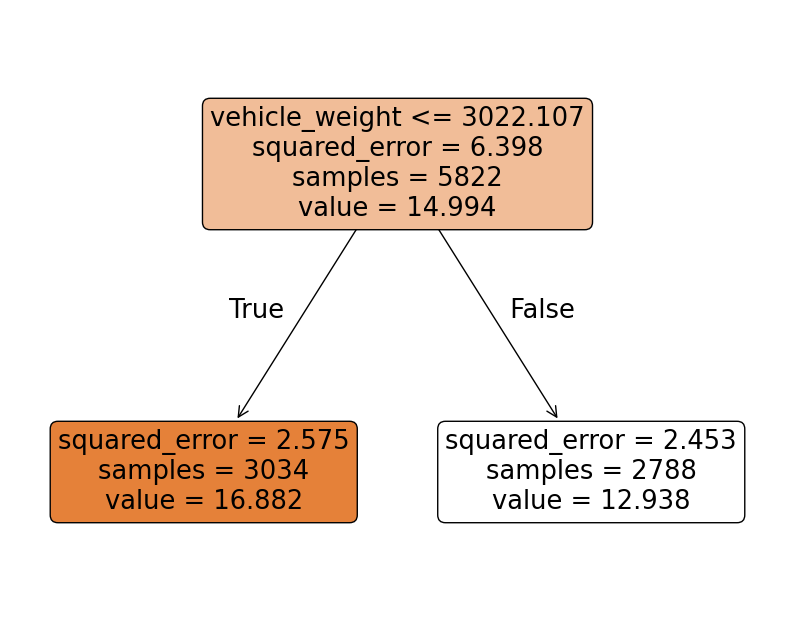

In [5]:
import matplotlib.pyplot as plt

# Visualize the trained Decision Tree
plt.figure(figsize=(10, 8))
plot_tree(dt, feature_names=dv.get_feature_names_out(), filled=True, rounded=True)
plt.show()

**Reasoning**:
The previous code failed because the target variable column 'MPG' was not in the DataFrame. Looking at the available dataframes, the target column is actually named 'fuel_efficiency_mpg'. I need to fix the column name and retry the steps.



## Train and evaluate Random Forest Regressor

### Subtask:
Train a Random Forest Regressor with specified parameters and calculate the RMSE on the validation set.

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Train a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

# Predict on the validation data
y_pred_val = rf.predict(X_val)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
print(f"The RMSE of the Random Forest Regressor on the validation data is: {rmse}")

The RMSE of the Random Forest Regressor on the validation data is: 0.4595777223092726


## Experiment with n_estimators

### Subtask:
Train Random Forest models with varying `n_estimators` and identify when RMSE stops improving.

In [18]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred_val = rf.predict(X_val)
    rmse = (np.sqrt(mean_squared_error(y_val, y_pred_val))).round(3)
    scores.append((n, rmse))
    print(f"n_estimators: {n}, RMSE: {rmse}")

# Convert scores to a DataFrame for easier analysis
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

# Display the scores
display(df_scores)

n_estimators: 10, RMSE: 0.46
n_estimators: 20, RMSE: 0.454
n_estimators: 30, RMSE: 0.452
n_estimators: 40, RMSE: 0.449
n_estimators: 50, RMSE: 0.447
n_estimators: 60, RMSE: 0.445
n_estimators: 70, RMSE: 0.445
n_estimators: 80, RMSE: 0.445
n_estimators: 90, RMSE: 0.445
n_estimators: 100, RMSE: 0.445
n_estimators: 110, RMSE: 0.444
n_estimators: 120, RMSE: 0.444
n_estimators: 130, RMSE: 0.444
n_estimators: 140, RMSE: 0.443
n_estimators: 150, RMSE: 0.443
n_estimators: 160, RMSE: 0.443
n_estimators: 170, RMSE: 0.443
n_estimators: 180, RMSE: 0.442
n_estimators: 190, RMSE: 0.442
n_estimators: 200, RMSE: 0.442


,n_estimators,rmse
0,10,0.460
1,20,0.454
2,30,0.452
3,40,0.449
4,50,0.447
5,60,0.445
6,70,0.445
7,80,0.445
8,90,0.445
9,100,0.445


In [20]:
# find the value of n_estimators where RMSE stop improving from df_scores
for i in range(1, len(df_scores)):
  print(df_scores.iloc[i-1, 1], df_scores.iloc[i, 1])
  if df_scores.iloc[i-1, 1] > df_scores.iloc[i, 1]:
    print(f"The value of n_estimators where RMSE stops improving is: {df_scores.iloc[i-1, 0]}")



0.46 0.454
The value of n_estimators where RMSE stops improving is: 10
0.454 0.452
The value of n_estimators where RMSE stops improving is: 20
0.452 0.449
The value of n_estimators where RMSE stops improving is: 30
0.449 0.447
The value of n_estimators where RMSE stops improving is: 40
0.447 0.445
The value of n_estimators where RMSE stops improving is: 50
0.445 0.445
0.445 0.445
0.445 0.445
0.445 0.445
0.445 0.444
The value of n_estimators where RMSE stops improving is: 100
0.444 0.444
0.444 0.444
0.444 0.443
The value of n_estimators where RMSE stops improving is: 130
0.443 0.443
0.443 0.443
0.443 0.443
0.443 0.442
The value of n_estimators where RMSE stops improving is: 170
0.442 0.442
0.442 0.442


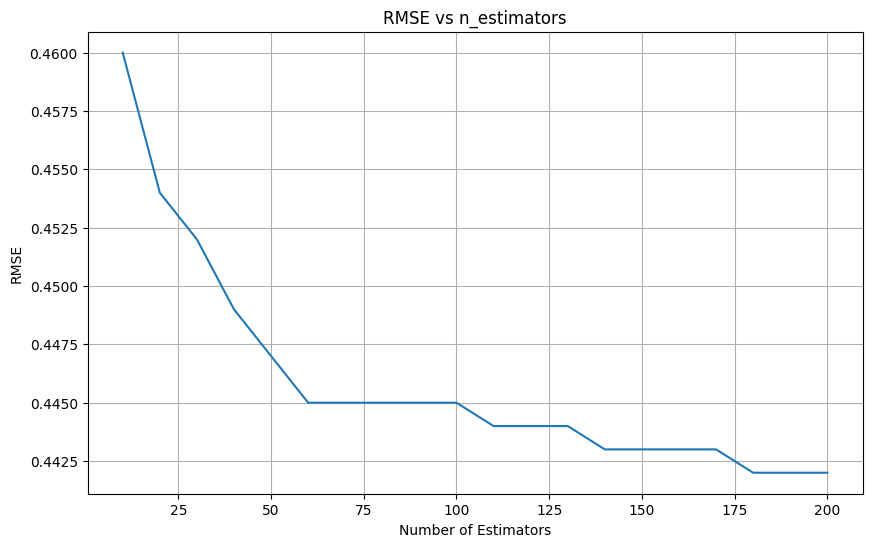

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_scores, x='n_estimators', y='rmse')
plt.title('RMSE vs n_estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

## Experiment with max_depth and n_estimators

### Subtask:
Train Random Forest models with different combinations of `max_depth` and `n_estimators` and find the best `max_depth` based on mean RMSE.

In [9]:
max_depths = [10, 15, 20, 25]
scores_depth = []

for depth in max_depths:
    print(f"Max depth: {depth}")
    temp_scores = []
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n, max_depth=depth, random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)
        y_pred_val = rf.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
        temp_scores.append(rmse)
        print(f"  n_estimators: {n}, RMSE: {rmse}")
    mean_rmse = np.mean(temp_scores)
    scores_depth.append((depth, mean_rmse))
    print(f"Mean RMSE for max_depth {depth}: {mean_rmse}")

# Convert scores to a DataFrame
df_scores_depth = pd.DataFrame(scores_depth, columns=['max_depth', 'mean_rmse'])

# Display the scores
display(df_scores_depth)

# Find the best max_depth
best_depth = df_scores_depth.loc[df_scores_depth['mean_rmse'].idxmin()]
print(f"\n The best max_depth based on mean RMSE is: {int(best_depth['max_depth'])}")

Max depth: 10
  n_estimators: 10, RMSE: 0.4502486597058524
  n_estimators: 20, RMSE: 0.44685703362920204
  n_estimators: 30, RMSE: 0.44547396459413735
  n_estimators: 40, RMSE: 0.4430673112962584
  n_estimators: 50, RMSE: 0.44195668621793566
  n_estimators: 60, RMSE: 0.4416730330613033
  n_estimators: 70, RMSE: 0.4412975503694072
  n_estimators: 80, RMSE: 0.4414352350072895
  n_estimators: 90, RMSE: 0.4415215165581006
  n_estimators: 100, RMSE: 0.44121699790710184
  n_estimators: 110, RMSE: 0.440526227247825
  n_estimators: 120, RMSE: 0.4407083659646053
  n_estimators: 130, RMSE: 0.440629500094825
  n_estimators: 140, RMSE: 0.44033941277349
  n_estimators: 150, RMSE: 0.43994270355172643
  n_estimators: 160, RMSE: 0.43979740503833187
  n_estimators: 170, RMSE: 0.4400174394744502
  n_estimators: 180, RMSE: 0.4397488696817066
  n_estimators: 190, RMSE: 0.43985420021815086
  n_estimators: 200, RMSE: 0.4398451062550146
Mean RMSE for max_depth 10: 0.44180786093233576
Max depth: 15
  n_estima

,max_depth,mean_rmse
0,10,0.441808
1,15,0.445417
2,20,0.446253
3,25,0.445910



 The best max_depth based on mean RMSE is: 10


In [24]:

# Train a Random Forest Regressor with specified parameters
rf_importance = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rf_importance.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_importance.feature_importances_

# Get feature names
feature_names = dv.get_feature_names_out()

# Create a pandas Series for easier sorting
feature_importance_series = pd.Series(feature_importances, index=feature_names)

# Find the most important feature
most_important_feature = feature_importance_series.sort_values(ascending=False)

most_important_feature
# print(f"The most important feature is: {most_important_feature}")

,0
vehicle_weight,0.959150
horsepower,0.015998
acceleration,0.011480
engine_displacement,0.003273
model_year,0.003212
num_cylinders,0.002343
num_doors,0.001635
origin=USA,0.000540
origin=Europe,0.000519
origin=Asia,0.000462


## Train Gradient Boosting Regressor

Train a Gradient Boosting Regressor model.

In [10]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=1)
gbr.fit(X_train, y_train)

# Predict on the validation data
y_pred_val_gbr = gbr.predict(X_val)

# Calculate RMSE
rmse_gbr = np.sqrt(mean_squared_error(y_val, y_pred_val_gbr))
print(f"The RMSE of the Gradient Boosting Regressor on the validation data is: {rmse_gbr}")

The RMSE of the Gradient Boosting Regressor on the validation data is: 0.4119765479077945


In [12]:
!pip install xgboost

### Prepare data for XGBoost

In [13]:
import xgboost as xgb

features = dv.get_feature_names_out().tolist()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

### Train XGBoost with eta = 0.3

In [14]:
xgb_params_03 = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

watchlist = [(dtrain, 'train'), (dval, 'val')]

model_03 = xgb.train(xgb_params_03, dtrain, evals=watchlist, num_boost_round=100, verbose_eval=10)

[0]	train-rmse:1.81393	val-rmse:1.85444
[10]	train-rmse:0.37115	val-rmse:0.43896
[20]	train-rmse:0.33553	val-rmse:0.43376
[30]	train-rmse:0.31475	val-rmse:0.43752
[40]	train-rmse:0.30202	val-rmse:0.43968
[50]	train-rmse:0.28456	val-rmse:0.44140
[60]	train-rmse:0.26768	val-rmse:0.44290
[70]	train-rmse:0.25489	val-rmse:0.44531
[80]	train-rmse:0.24254	val-rmse:0.44689
[90]	train-rmse:0.23193	val-rmse:0.44839
[99]	train-rmse:0.21950	val-rmse:0.45018


### Train XGBoost with eta = 0.1

In [15]:
xgb_params_01 = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model_01 = xgb.train(xgb_params_01, dtrain, evals=watchlist, num_boost_round=100, verbose_eval=10)

[0]	train-rmse:2.28944	val-rmse:2.34561
[10]	train-rmse:0.91008	val-rmse:0.94062
[20]	train-rmse:0.48983	val-rmse:0.53064
[30]	train-rmse:0.38342	val-rmse:0.44289
[40]	train-rmse:0.35343	val-rmse:0.42746
[50]	train-rmse:0.33998	val-rmse:0.42498
[60]	train-rmse:0.33054	val-rmse:0.42456
[70]	train-rmse:0.32202	val-rmse:0.42503
[80]	train-rmse:0.31667	val-rmse:0.42563
[90]	train-rmse:0.31059	val-rmse:0.42586
[99]	train-rmse:0.30419	val-rmse:0.42623


### Compare RMSE for different eta values

In [16]:
y_pred_val_03 = model_03.predict(dval)
rmse_03 = np.sqrt(mean_squared_error(y_val, y_pred_val_03))
print(f"RMSE with eta=0.3: {rmse_03}")

y_pred_val_01 = model_01.predict(dval)
rmse_01 = np.sqrt(mean_squared_error(y_val, y_pred_val_01))
print(f"RMSE with eta=0.1: {rmse_01}")

if rmse_01 < rmse_03:
    print("eta=0.1 leads to the best RMSE score.")
elif rmse_03 < rmse_01:
    print("eta=0.3 leads to the best RMSE score.")
else:
    print("Both eta values give equal RMSE scores.")

RMSE with eta=0.3: 0.45017755678087246
RMSE with eta=0.1: 0.42622800553359225
eta=0.1 leads to the best RMSE score.


## Experiment with max_depth for XGBoost

### Subtask:
Train XGBoost models with varying `max_depth` values and find the best `max_depth` based on RMSE.

In [17]:
max_depths_xgb = [3, 4, 5, 6, 8, 10]
scores_xgb_depth = []

for depth in max_depths_xgb:
    print(f"Max depth: {depth}")
    xgb_params_depth = {
        'eta': 0.1,
        'max_depth': depth,
        'min_child_weight': 1,
        'objective': 'reg:squarederror',
        'nthread': 8,
        'seed': 1,
        'verbosity': 1,
    }

    model_depth = xgb.train(xgb_params_depth, dtrain, evals=watchlist, num_boost_round=100, verbose_eval=False)
    y_pred_val_depth = model_depth.predict(dval)
    rmse_depth = np.sqrt(mean_squared_error(y_val, y_pred_val_depth))
    scores_xgb_depth.append((depth, rmse_depth))
    print(f"  RMSE: {rmse_depth}")

# Convert scores to a DataFrame
df_scores_xgb_depth = pd.DataFrame(scores_xgb_depth, columns=['max_depth', 'rmse'])

# Display the scores
display(df_scores_xgb_depth)

# Find the best max_depth
best_depth_xgb = df_scores_xgb_depth.loc[df_scores_xgb_depth['rmse'].idxmin()]
print(f"\n The best max_depth based on RMSE is: {int(best_depth_xgb['max_depth'])}")

Max depth: 3
  RMSE: 0.41548196641939394
Max depth: 4
  RMSE: 0.41763783505178825
Max depth: 5
  RMSE: 0.4208737670012502
Max depth: 6
  RMSE: 0.42622800553359225
Max depth: 8
  RMSE: 0.4388130769540909
Max depth: 10
  RMSE: 0.4533618350256884


,max_depth,rmse
0,3,0.415482
1,4,0.417638
2,5,0.420874
3,6,0.426228
4,8,0.438813
5,10,0.453362



 The best max_depth based on RMSE is: 3
